In [1]:
import numpy as np
import scipy.sparse as sparse

In [19]:
data = [1.0, 1.0, 1.0, 3.0, 4.4]
col = [0, 2, 2, 1, 1]
row = [0, 0, 0, 1, 2]
A = sparse.coo_matrix((data, (row, col)), shape=(3,3))
print(A.todense())
print(A.data.dtype, A.data.shape)
print(A.col.dtype, A.col.shape)
print(A.row.dtype, A.row.shape)
print(A.nnz)

[[ 1.   0.   2. ]
 [ 0.   3.   0. ]
 [ 0.   4.4  0. ]]
float64 (5,)
int32 (5,)
int32 (5,)
5


In [23]:
print(A.format)
A = A.tocsr()
print(A.format)
print(A.data)
print(A.indices)
print(A.indptr)
A[0,0] = 0.0
print(A.todense())
print(A.nnz)
A.eliminate_zeros()
print(A.nnz)

csr
csr
[ 0.   2.   3.   4.4]
[0 2 1 1]
[0 2 3 4]
[[ 0.   0.   2. ]
 [ 0.   3.   0. ]
 [ 0.   4.4  0. ]]
4
3


Let's make a *random* sparse matrix

First we'll set the density so that
$$
density = \frac{nnz(A)}{n^2}
$$

In [25]:
n = 1000
density = 5.0 / n # 5 points per row
nnz = int(n*n*density)
print(nnz)

5000


Now make the entries:

In [26]:
row = np.random.random_integers(low=0, high=n-1, size=nnz)
col = np.random.random_integers(low=0, high=n-1, size=nnz)
data = np.ones(nnz, dtype=float)

A = sparse.coo_matrix((data, (row, col)), shape=(n, n))
print(A.dtype)

float64


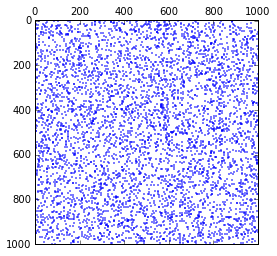

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.spy(A, marker='.', markersize=2)

In [31]:
print(A.shape, A.nnz)

(1000, 1000) 5000


But let's make it positive definite:

In [32]:
A.data[:] = -1.0                   # -1 for off-diagonals
rowsum = -np.array(A.sum(axis=1))  # positive rowsum
rowsum = rowsum.ravel()
A.setdiag(rowsum)

In [33]:
u = np.random.rand(n)
v = np.random.rand(n)

In [34]:
%timeit v = A * u

The slowest run took 7.25 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 13.9 µs per loop


In [38]:
B = A.toarray()

In [39]:
type(B)

numpy.ndarray

In [40]:
%timeit v = B.dot(u)

1000 loops, best of 3: 555 µs per loop
